In [1]:
from nn import MLP
from engine import Value
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_moons, make_blobs
%matplotlib inline

In [2]:
np.random.seed(24)
random.seed(24)

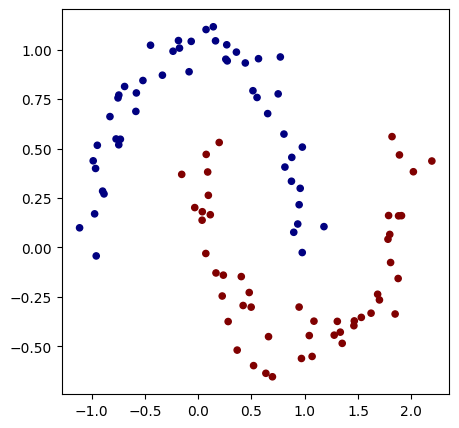

In [3]:
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
mlp = MLP(2, [16, 16, 1])
print(mlp)
print(f'Number of parameters: {len(mlp.parameters())}')

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
Number of parameters: 337


In [5]:
def loss(batch_size=None):

    if batch_size:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        X_train, y_train = X[ri], y[ri]
    else:
        ri = np.random.permutation(X.shape[0])
        X_train, y_train = X[ri], y[ri] 

    inputs = [list(map(Value, x_train)) for x_train in X_train]
    scores = list(map(mlp, inputs))

    # (1 + -yi*y_pred).relu() is same as max(0, (1 + -yi*y_pred)) which is hinge loss
    losses = [(1 + -yi*y_pred).relu() for yi, y_pred in zip(y_train, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
    alpha = 1e-4
    reg_loss = alpha * sum((p * p) for p in mlp.parameters())
    total_loss = data_loss + reg_loss
    accuracy = [(yi > 0) == (y_pred.data > 0) for yi, y_pred in zip(y_train, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

In [6]:
total_loss, accuracy = loss()
total_loss, accuracy

(Value(data=1.4903675074105545), 0.28)

In [7]:
lr = 0.1
for itr in range(1000):
    total_loss, accuracy = loss()

    # reset gradients
    for p in mlp.parameters():
        p.grad = 0
    
    total_loss.backward()

    for p in mlp.parameters():
        p.data -= lr * p.grad

    if itr % 10 == 0:
        print(f'Itr no: {itr + 1}, accuracy: {accuracy * 100}%, loss: {total_loss.data}')

Itr no: 1, accuracy: 28.000000000000004%, loss: 1.4903675074105547
Itr no: 11, accuracy: 83.0%, loss: 0.4457055714419894
Itr no: 21, accuracy: 88.0%, loss: 0.37137765352461244
Itr no: 31, accuracy: 90.0%, loss: 0.33766262332605534
Itr no: 41, accuracy: 90.0%, loss: 0.30305338981829455
Itr no: 51, accuracy: 93.0%, loss: 0.26564979341531986
Itr no: 61, accuracy: 91.0%, loss: 0.2770258691347979
Itr no: 71, accuracy: 91.0%, loss: 0.2528732898009062
Itr no: 81, accuracy: 94.0%, loss: 0.19183988148024153
Itr no: 91, accuracy: 96.0%, loss: 0.13821704182174513
Itr no: 101, accuracy: 97.0%, loss: 0.12263177326937509
Itr no: 111, accuracy: 78.0%, loss: 1.4621716598346421
Itr no: 121, accuracy: 88.0%, loss: 0.39835221281630656
Itr no: 131, accuracy: 88.0%, loss: 0.3979519460563252
Itr no: 141, accuracy: 88.0%, loss: 0.390216260067594
Itr no: 151, accuracy: 87.0%, loss: 0.38343149304299223
Itr no: 161, accuracy: 87.0%, loss: 0.37830605382812604
Itr no: 171, accuracy: 87.0%, loss: 0.373792998903986

KeyboardInterrupt: 